<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
*
<center> <h3> Module 9: Machine Learning Advanced</h3> </center>
<center> <h4> Classification models </h4> </center>
*

###**WORKING ENVIRONMENT SET UP**

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
#!pip install pydot
import pydot

# Save model / deployment
import pickle
import sys


## 1.- Load Data

El dataset consiste en un conjunto de 19 parámetros calculados a partir registros de camañas pasadas asociadas al cliente. Estas variables, recogen distintas características del cliente, desde su edad, estado civil, educación así como información asociada a la cuenta.


**Descripción del dataset**

Este problema de clasificación binaria tiene como objetivo predecir si el cliente suscribirá un depósito bancario a plazo (variable **output**).

Variables de entrada:

#### Bank client data:
- **age** (numeric)

- **job**: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- **marital_status** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- **education_level** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- **is_default**: has credit in default? (categorical: "no","yes","unknown")

- **housing_type**: has housing loan? (categorical: "no","yes","unknown")

- **loan:** has personal loan? (categorical: "no","yes","unknown")

#### Related with the last contact of the current campaign:

- **contact:** contact communication type (categorical: "cellular","telephone")

- **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

- **day_of_week:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")

##### Other attributes:
- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

##### Social and economic context attributes
- **emp_var_rate:** employment variation rate - quarterly indicator (numeric)

- **cons_price_index:** consumer price index - monthly indicator (numeric)

- **cons_conf_index**: consumer confidence index - monthly indicator (numeric)

- **euribor_3m:** euribor 3 month rate - daily indicator (numeric)

- **n_employed**: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
- **output**: - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
Local = True

In [1]:
'''if Local == True:
    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ
    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing
    train_df = pd.read_csv('train.csv').drop('id', axis=1)
else:
    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop('id', axis=1)
'''

'if Local == True:\n    !gdown https://drive.google.com/uc?id=1X7AIcMKUOA7-nOUptjo2Cx6lL4hIIHzQ\n    # https://drive.google.com/file/d/1nxD5meFAO-NvDhuteBJ7KgifG10Bfsoa/view?usp=sharing\n    train_df = pd.read_csv(\'train.csv\').drop(\'id\', axis=1)\nelse:\n    train_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/train.csv").drop(\'id\', axis=1)\n'

In [7]:
train_df = pd.read_csv('train.csv').drop('id', axis=1)

In [8]:
train_df.head()

,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed,output
0,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 2.- Exploratory Data Analysis (Data Understanding / Descriptive Analysis)

In [ ]:
##------------------------
# Analyze the data



### 2.1.- Descriptive Analysis

#### Correlations

#### Feature Engineering
Apply here all the transformations you consider necessary for training a model.

In [ ]:
train_transformed = train_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed',
                              'output']]

In [ ]:
### EJEMPLO

## Crear el encoder
#encoder_contact = OneHotEncoder()

## Fit
#encoder_contact.fit(train_transformed)

# Transform
#train_transformed = encoder_contact.transform(train_transformed)



## 3.- Data Model

In [ ]:
##----------------------------
# Train & Test split

X = train_transformed.drop('output',axis=1)
y = train_transformed['output']

seed =   1957 #año de nacimiento
test_size =  0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = seed , test_size = test_size)


### 3.1.- Training a Logistic Regression Model

In [ ]:
#----------------------------------------
# Train a model
from sklearn.linear_model import LogisticRegression

model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234)
model_rl_1.fit(X_train, y_train)

#-----------------------------------------
# Predict con el dataset de test

y_pred = model_rl_1.predict(X_test)
y_pred_prb = model_rl_1.predict_proba(X_test)

In [ ]:
#--------------------------------------------
# Compute Metrics

##----------------------------------------
# Compute metrics Function

def compute_metrics(model,X_train, y_train, X_test, y_test, trh = 0.5):
  y_pred_proba_train = model.predict_proba(X_train)[:, 1]
  y_pred_proba_test = model.predict_proba(X_test)[:, 1]
  y_pred = (model.predict_proba(X_test)[:,1] >= trh).astype(bool)

  [fpr_train, tpr_train, thr_train] = metrics.roc_curve(y_train, y_pred_proba_train)
  [fpr_test, tpr_test, thr_test] = metrics.roc_curve(y_test, y_pred_proba_test)


  mcm = metrics.confusion_matrix(y_test, y_pred)
  tn = mcm[0, 0]
  tp = mcm[1, 1]
  fn = mcm[1, 0]
  fp = mcm[0, 1]

  Specificity = tn / (tn + fp)

  #create ROC curve
  plt.plot(fpr_train,tpr_train, '-r')
  plt.plot(fpr_test,tpr_test, '-b')
  plt.plot([0, 1], ls="--")
  plt.legend(['train','test'])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  print('Train/Test split results:')
  print(model.__class__.__name__+" accuracy is %2.3f" % metrics.accuracy_score(y_test, y_pred))
  print(model.__class__.__name__+" auc in test is %2.3f" % metrics.auc(fpr_test, tpr_test))
  print(model.__class__.__name__+" auc in train is %2.3f" % metrics.auc(fpr_train, tpr_train))
  print(model.__class__.__name__+" Sensitivity is %2.3f" % metrics.recall_score(y_test, y_pred))
  print(model.__class__.__name__+" Specificity is %2.3f" % Specificity)
  print(model.__class__.__name__+" F1 is %2.3f" % metrics.f1_score(y_test, y_pred))

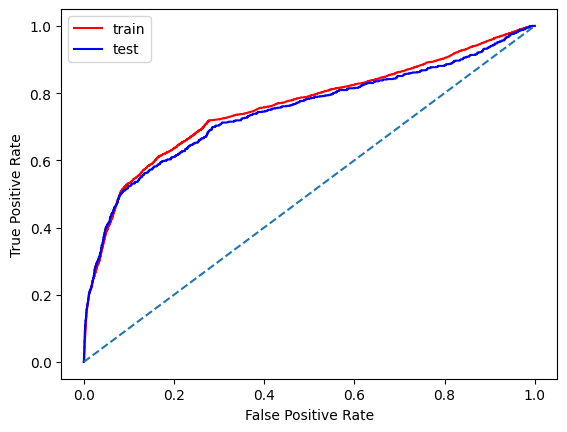

Train/Test split results:
LogisticRegression accuracy is 0.898
LogisticRegression auc in test is 0.746
LogisticRegression auc in train is 0.760
LogisticRegression Sensitivity is 0.196
LogisticRegression Specificity is 0.989
LogisticRegression F1 is 0.307


In [ ]:
compute_metrics(model_rl_1, X_train, y_train, X_test, y_test)

## Kaggle Submission

In [ ]:
## Kaggle Competition
#---> https://www.kaggle.com/t/316fa1a3165d42d0aed367fba46c7601



In [ ]:
# Descarga el dataset de test para hacer la predicción:
import pandas as pd

if Local == True:
    !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
    valid_df = pd.read_csv('test.csv')
else:
    valid_df = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 118MB/s]


In [ ]:
valid_df.head()

,id,age,job,marital_status,education_level,is_default,housing_type,loan,contact,month,day_of_week,campaing,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,euribor_3m,n_employed
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


#### Feature Engineering a valid_df
Aplicar las transformaciones a valid_df (las mismas que realizaste para train_df)

In [ ]:
valid_transformed = valid_df[['age','campaing','pdays',
                              'previous','emp_var_rate', 'cons_price_index',
                              'cons_conf_index', 'euribor_3m', 'n_employed']]

In [ ]:
#valid_transformed = encoder_contact.transform(valid_transformed)


In [ ]:
#################################
#Función auxiliar (NO MODIFICAR):
#################################

def eval_best_model(final_model, valid_df):

    if Local == True:
      !gdown https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
      Id_aux = pd.read_csv('test.csv')
    else:
      Id_aux = pd.read_csv("/kaggle/input/2310-machine-learning-avanzado-immune/test.csv")

    columns = final_model.feature_names_in_
    X_valid = valid_df[columns]
    y_valid_pred = final_model.predict(X_valid)

    submission = pd.DataFrame({'id': Id_aux['id'],
                               'output': y_valid_pred})
    return (submission)

In [ ]:
submission = eval_best_model(model_rl_1, valid_transformed)

Downloading...
From: https://drive.google.com/uc?id=1YOzZY6MrVyYfmW5YkKYj1afmyaAHmHvD
To: /content/test.csv
100% 954k/954k [00:00<00:00, 78.0MB/s]


In [ ]:
submission.to_csv('./submissionPruebaMarce.csv', index = False)

In [ ]:
submission.shape

(8080, 2)